# Capstone 1: Data Story Assignment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# This dataset is very large, so I will only be using one file (one year's worth 
# of data) for this assignment.
dat = pd.read_csv('D:/Documents/SpringBoard/capstone-1/datasets/final_files/combined/filled/2017_all.csv', 
                  dtype={'Zone':'category', 'Transmitter':'category', 
                         'animal_weight':'float64','animal_length_total':'float64', 
                         'gender':'category', 'location':'category', 'year':'category',
                         'Receiver_D':'float64', 'Lat':'float64', 'Lng':'float64', 
                         'DepthGradient':'float64', 'TempC':'float64', 'Sal':'float64',
                         'ChlA':'float64', 'MoonPhase':'category'}, 
                 parse_dates = ['Date'])
    # read in the dataset but make sure the columns are read in appropriately

dat = dat[dat['Date'] < '2018-01-01'] # the datasets have a little bit of overlap
    # in the datetime, just so we don't miss anything. For the purpose of this
    # exercise, let's just make sure we only have 2017 data.

#### 1. Can you count something interesting?

In [3]:
# I can count how many days out of the year sharks are detected and compare it 
# to how many days of the year receivers are in the water.

# Housekeeping
dat['Transmitter'] = dat['Transmitter'].cat.add_categories(['NoSharks'])
    # add a category to replace NAs when no sharks are present
dat['Transmitter'] = dat['Transmitter'].fillna(value='NoSharks') # and replace it with 'No Sharks'

# And counting
shark_days = len(dat[dat['Transmitter'] != 'NoSharks'].drop_duplicates(subset='Date'))
    # find the length of the dataframe when there are sharks and duplicate days are removed
    # This == the number of days at least one shark was present
receiver_days = len(dat[dat['Receiver_D'] > 0].drop_duplicates(subset='Date'))
    # find the length of the dataframe when there are receivers in the water and duplicate
    # days are removed. This == the number of days at least one receiver is present
    
# Print results
print(str(shark_days)+' days that sharks were present') # the number of days that sharks were there
print(str(receiver_days)+ ' days that receivers were deployed') # the number of days that
    # receivers are listening
print('Sharks were present '+str(round((shark_days/receiver_days)*100, ndigits=2))+'% of the year.')
    # the percent of sharks days to receiver days

290 days that sharks were present
365 days that receivers were deployed
Sharks were present 79.45% of the year.


In [4]:
# Interesting, so even though there was at least one receiver in the water every
# day of the year, sharks weren't always picked up. In fact, they were only 
# present about 80% of the time. 

#### 2. Can you find trends?

In [5]:
# Let's see whether there's a change in how many sharks are present over the 
# course of one year. 

sharks_present = dat[dat['Transmitter'] != 'NoSharks'] # remove data where no sharks
    # are present
sharks_present = sharks_present.drop_duplicates(subset=['Date','Transmitter'])
    # remove rows where dates and transmitters are duplicate
sharks_per_day = sharks_present[['Date', 'Transmitter']].groupby(['Date']).agg('count')
    # count the number of unique transmitters per date

# And we can also see whether there's a change in how many receivers are
# deployed over the course of one year
receivers_per_day = dat[['Date','Receiver_D']].groupby('Date').agg('sum') 
    # add up all the receivers that are in the water each day

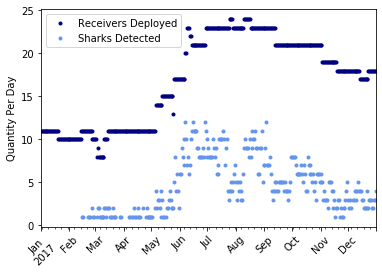

In [6]:
# If we plot them, we can see how the trends are
receivers_per_day['Receiver_D'].plot(style='.', color='navy') # plots receiver density
sharks_per_day['Transmitter'].plot(rot=45, style='.', color='cornflowerblue')
    # adds the quantity of sharks present
plt.title('') # no title
plt.ylabel('Quantity Per Day') # ylabel is the quantity of each group
plt.xlabel('') # no x label because dates are pretty self-explanatory
plt.legend(['Receivers Deployed', 'Sharks Detected']) # add the legend but change the
    # names of the groups so that it makes more sense
plt.show() # show the plot

In [7]:
# The trend here looks like June and Septemper had the highest number of
# receivers in the water listening for sharks, and the highest number of
# sharks present. 

# It appears like there is a relationship between the number of receivers
# in the water and the number of sharks that are detected. 

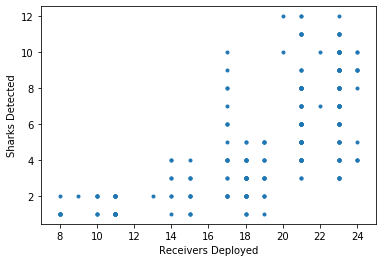

In [8]:
combined = receivers_per_day.merge(sharks_per_day, left_index=True, right_index=True).fillna(0)
    # let's make a combined dataset for each day that merges receiver presence and shark
    # presence. We'll add 0s where NAs are present so that we know that no sharks were present
    # on thsoe days

combined.plot(x='Receiver_D', y='Transmitter', style='.', xlim=(7,25), legend=False)
    # plot this with receiver density on the x and the number of sharks on the y
    # plot it without a legend and with xlims that make the graph look nicer
plt.ylabel('Sharks Detected') # y axis is the number of sharks detected
plt.xlabel('Receivers Deployed') # x axis is the number of receivers deployed
plt.show() # show the plot

In [9]:
# There's kind of a trend here but there's a lot of variation so maybe there
# are also other things going on here.

#### 3. Can you make a bar plot or a histogram?

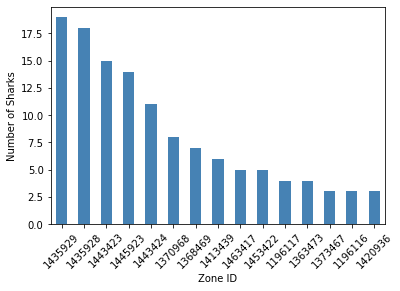

In [10]:
# Sure thing! Let's make a histogram of the number of sharks per grid cell to see
# if any specific locations have higher or lower shark density. 

sharks_per_grid = dat[dat['Transmitter'] != 'NoSharks'].drop_duplicates(subset=['Zone','Transmitter'])
    # keep only data with sharks present and remove duplicates of zone and transmitter (we don't)
    # care about date for this one
sharks_per_grid = sharks_per_grid[['Zone','Transmitter']].groupby('Zone').agg('count')
    # group the data by zone and count how many transmitters are present
sharks_per_grid = sharks_per_grid.sort_values('Transmitter', ascending=False)
    # sort the values in ascending order so we only plot the 15 most 'popular' zones

sharks_per_grid[0:15].plot(kind='bar', color='steelblue', rot=45, legend=False)
    # plot the first 15 values in a bar graph
plt.ylabel('Number of Sharks') # y axis is the number of sharks present in that zone 
    # over the course of one year
plt.xlabel('Zone ID') # x axis is zone ID
plt.show() # show the plot

In [11]:
# It does look like some zones have way more sharks than others. Are the same
# zones the ones with the highest number of receivers? 

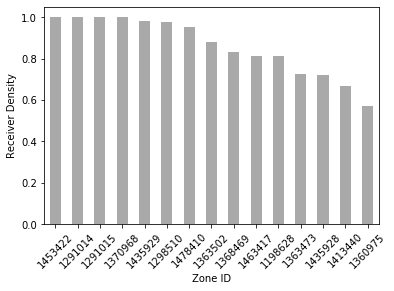

In [12]:
receivers_per_grid = dat[['Receiver_D','Zone']].groupby(['Zone']).agg('sum')
    # calculate the sum of receivers in each zone
    # Note that this gives us the receiver density each day, so if one receiver
    # was present in a grid every day of the year, we would get a value of 365.
    # But we want to know how many receivers are there and how long they stay.
receivers_per_grid['Receiver_D'] = receivers_per_grid['Receiver_D']/365 # so lets
    # just grab the average of those values instead
receivers_per_grid = receivers_per_grid.sort_values('Receiver_D', ascending=False)
    # sort in descending order so we only plot the 15 most 'popular' zones

receivers_per_grid[0:15].plot(kind='bar', color='darkgray', rot=45, legend=False)
    # plot the first 15 values in a bar graph
plt.ylabel('Receiver Density') # y axis is receiver density
plt.xlabel('Zone ID') # x axis is zone ID
plt.show() # show the plot

In [13]:
# The ones on this graph don't match the above graph, so it doesn't seem like
# receiver density is really driving the shark presence. 
# In other words, it's not that sharks are there and they aren't being detected; 
# it's that they aren't there.

#### 4. Can you compare two related quantities?

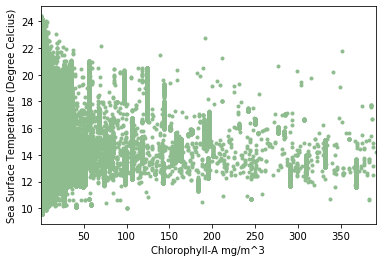

In [14]:
# Let's compare chlorophyll A and sea surface temperature

dat.plot('ChlA', 'TempC', style ='.', legend=False, color='darkseagreen')
    # plot chl-a on the x axis and temperature on the y axis as a . plot
plt.ylabel('Sea Surface Temperature (Degree Celcius)') # ylabel is sst
plt.xlabel('Chlorophyll-A mg/m^3') # xaxis is chla
plt.show() # show the plot

In [15]:
# This plot looks interesting. There's obviously not a direct, linear 
# relationship between these too parameters. However, it does seem like there
# is a sweet spot in temperature where chlorophyll A values really sky-rocket
# Between about 12 and 17 degrees Celcius is a good temperature for ChlA.

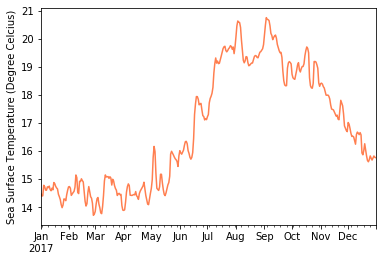

In [16]:
# And, sea surface temperature is definitely related to date, because
# seas are warmer during the summer months. So we can plot that as well. 

ave_sst = dat[['TempC', 'Date']].groupby('Date').agg('mean') 
    # get the mean temperature each day
ave_sst.plot(legend=False, color='coral') # and plot it
plt.ylabel('Sea Surface Temperature (Degree Celcius)')
    # y axis is sst
plt.xlabel('') # x axis is date and self explanatory
plt.show() # show the plot

In [17]:
# Yes, we can see a peak in SST between July and October! It also
# looks to have a similar peak as the shark presence data from above, 
# but the sharks arrive and leave a little bit earlier. 

#### 5. Can you make a scatterplot?

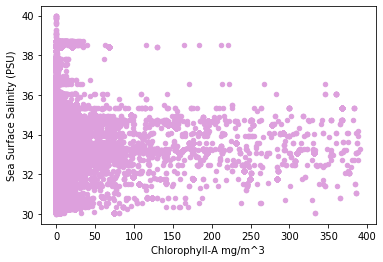

In [18]:
# I'll make some more scatterplots. Let's see how chlorophyll-A and salinity
# work together using a scatterplot. 

dat.plot('ChlA', 'Sal', kind='scatter', legend=False, color='plum')
    # plot chla vs salinity using a scatter plot
plt.ylabel('Sea Surface Salinity (PSU)') # y axis is salinity
plt.xlabel('Chlorophyll-A mg/m^3') # x axis is chla
plt.show() # show the plot

In [19]:
# There doesn't seem to be much of a relationship here. There's higher variation
# in ChlA values in salinities between 32-36 psu than the other values, but
# the seawater is usually 33-35 psu anyway. I think this 'relationship'
# is primarily driven data distribution of salinity values.

#### 6. Can you make a time series plot?

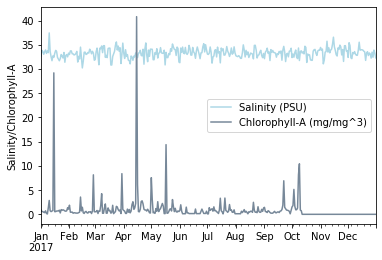

In [20]:
# I'll make another time series plot. Let's see how chlorophyll-A and
# sea surface salinity change over time.

aves = dat[['Sal', 'ChlA', 'Date']].groupby('Date').agg('mean')
    # calcaulate the average salinity and chl-a each day
aves.plot(color=['lightblue', 'lightslategray'], legend=False)
    # and plot the data in different colors
plt.legend(['Salinity (PSU)', 'Chlorophyll-A (mg/mg^3)'])
    # add a legend with labels that are more clear
plt.ylabel('Salinity/Chlorophyll-A') # and add a clear y axis
plt.xlabel('') # xlabel is time which is pretty self explanatory
plt.show() # show the plot

In [21]:
# From this we see that salinity is pretty consistent throughout
# the year, but that there are sometimes massive peaks in ChlA values
# particularly in January, April, and May... I wonder why that could be